<a href="https://colab.research.google.com/github/SamboTrener/ML_HWs/blob/main/11_009_Kolesnikov_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ:

1. Использовать датасет `telecom_churn.csv`
2. Обучить LogisticRegression. Использовать в качестве `baseline`.
3. Обучить на этом датасете все три вида ансамблей, использованных в этом ноутбуке. Сравнить с baseline
4. Использовать PCA для понижения размерности, или использовать статистическим методом отбор признаков SelectKBest. Затем обучить LogisticRegression в качестве `baseline`, и обучить все три вида ансамблей, рассмотренных в этом ноутбуке.
5. Сравнить результаты между собой до понижения размерности или отбора признаков, так и после них.


In [2]:
from google.colab import files

uploaded = files.upload()

Saving telecom_churn.csv to telecom_churn.csv


In [4]:
import pandas as pd

data = pd.read_csv('./telecom_churn.csv')
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
data.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [7]:
cat_columns = [i for i in data.columns if data[i].dtype in ['object', 'bool']]
cat_columns

['State', 'International plan', 'Voice mail plan', 'Churn']

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in cat_columns:
    data[col] = labelencoder.fit_transform(data[col])

data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy_scores={}
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    model_name = model.__class__.__name__
    print(model_name)
    print(accuracy)
    accuracy_scores[model_name] = accuracy
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
    disp.plot()
    plt.show()

In [17]:
import warnings
warnings.filterwarnings('ignore')

LogisticRegression
0.8577857785778578


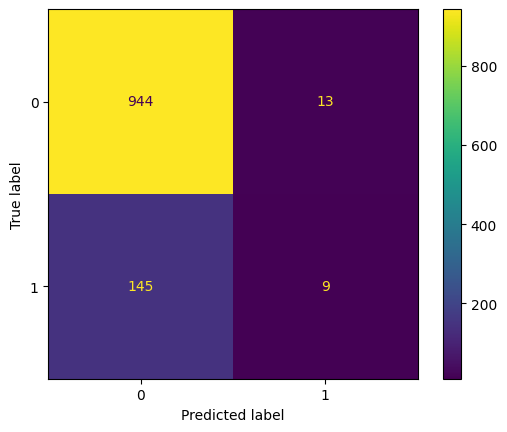

StackingClassifier
0.9126912691269127


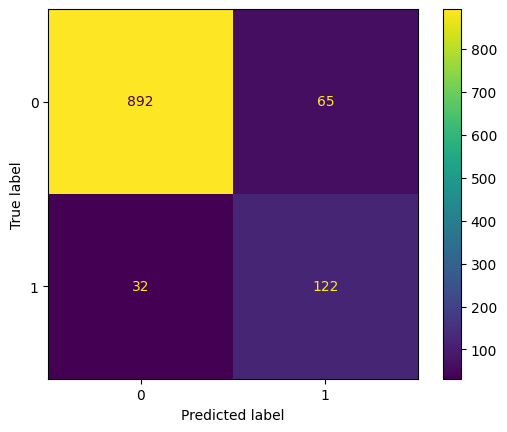

BaggingClassifier
0.8604860486048604


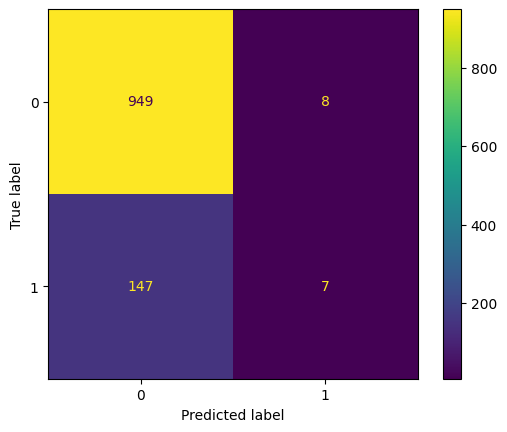

GradientBoostingClassifier
0.9072907290729073


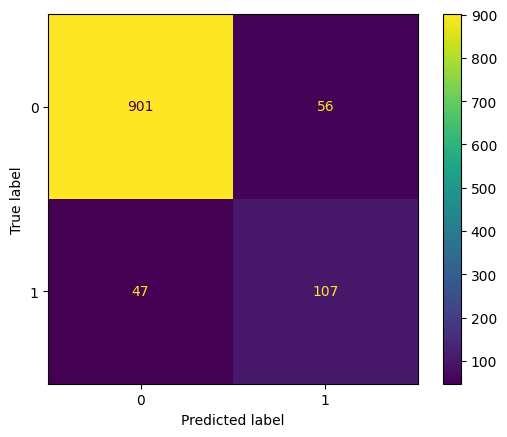

AdaBoostClassifier
0.9405940594059405


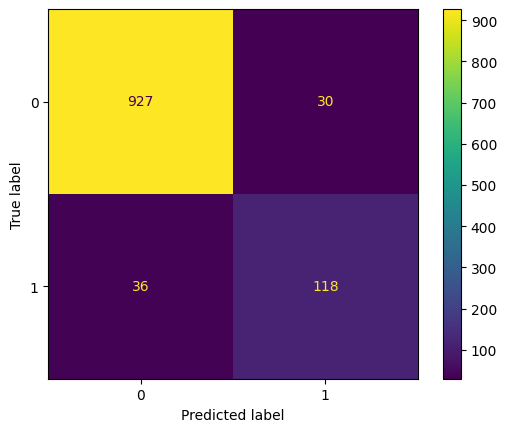

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
X = data.iloc[:,:-1]
y = data['Churn']
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

regression = LogisticRegression()
train_model(regression)

estimators = [('regression', LogisticRegression()), ('dt', DecisionTreeClassifier())]

stack_classifier = StackingClassifier(estimators=estimators, final_estimator=SVC())
train_model(stack_classifier)

bag_classifier = BaggingClassifier(LogisticRegression())
train_model(bag_classifier)

gradiBoost_classifier = GradientBoostingClassifier(max_depth=2, n_estimators=150, random_state=12, learning_rate=1)
train_model(gradiBoost_classifier)

adaBoost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=12)
train_model(adaBoost_classifier)

In [20]:
print(*sorted(accuracy_scores.items(), key = lambda x: x[1], reverse=True), sep='\n')

('AdaBoostClassifier', 0.9405940594059405)
('StackingClassifier', 0.9126912691269127)
('GradientBoostingClassifier', 0.9072907290729073)
('BaggingClassifier', 0.8604860486048604)
('LogisticRegression', 0.8577857785778578)


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

kBest = SelectKBest(chi2, k=10)
kBest.fit_transform(X, y)
best_features = kBest.get_feature_names_out()
X_best = X[best_features]
X_best

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Customer service calls
0,128,0,1,25,265.1,45.07,197.4,16.78,244.7,1
1,107,0,1,26,161.6,27.47,195.5,16.62,254.4,1
2,137,0,0,0,243.4,41.38,121.2,10.30,162.6,0
3,84,1,0,0,299.4,50.90,61.9,5.26,196.9,2
4,75,1,0,0,166.7,28.34,148.3,12.61,186.9,3
...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,26.55,215.5,18.32,279.1,2
3329,68,0,0,0,231.1,39.29,153.4,13.04,191.3,3
3330,28,0,0,0,180.8,30.74,288.8,24.55,191.9,2
3331,184,1,0,0,213.8,36.35,159.6,13.57,139.2,2


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size = 1/3, random_state = 0)

LogisticRegression
0.8685868586858686


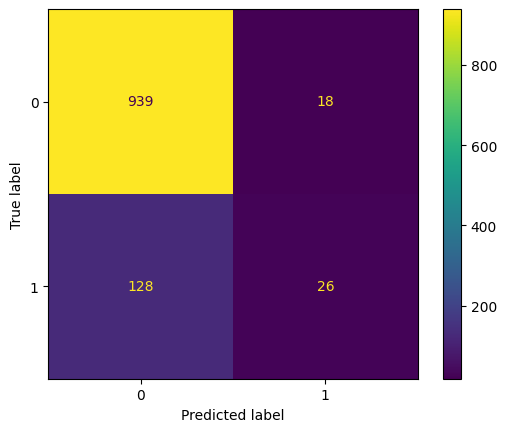

StackingClassifier
0.8955895589558955


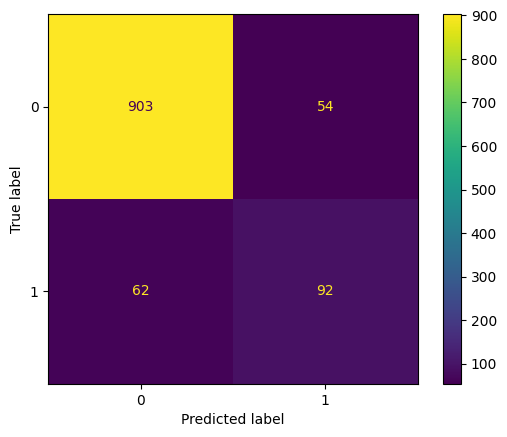

BaggingClassifier
0.8667866786678667


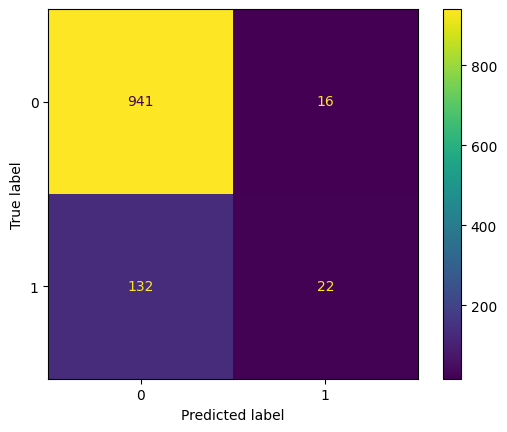

AdaBoostClassifier
0.8955895589558955


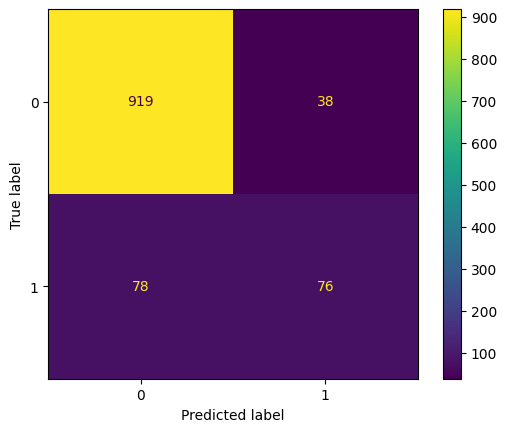

GradientBoostingClassifier
0.8757875787578758


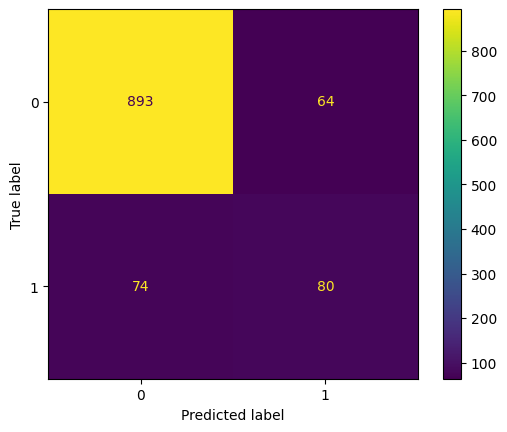

In [26]:
accuracy_scores_base = accuracy_scores.copy()
regression = LogisticRegression()
train_model(regression)

estimators = [('regression', LogisticRegression()), ('dt', DecisionTreeClassifier())]
stack_classifier = StackingClassifier(estimators=estimators, final_estimator=SVC())
train_model(stack_classifier)

bag_classifier = BaggingClassifier(LogisticRegression())
train_model(bag_classifier)

ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=12)
train_model(ada_classifier)

gradboost_classifier = GradientBoostingClassifier(max_depth=2, n_estimators=150,
                                      random_state=12, learning_rate=1)
train_model(gradboost_classifier)

In [27]:
print(*sorted(accuracy_scores.items(), key = lambda x: x[1], reverse=True), sep='\n')

('StackingClassifier', 0.8955895589558955)
('AdaBoostClassifier', 0.8955895589558955)
('GradientBoostingClassifier', 0.8757875787578758)
('LogisticRegression', 0.8685868586858686)
('BaggingClassifier', 0.8667866786678667)


In [28]:
print('model name', 'score(best)', 'base score', sep='  ')
for key in accuracy_scores.keys():
    print(key[:12], accuracy_scores[key], accuracy_scores_base[key],sep='    ')

model name  score(best)  base score
LogisticRegr    0.8685868586858686    0.8577857785778578
StackingClas    0.8955895589558955    0.9126912691269127
BaggingClass    0.8667866786678667    0.8604860486048604
AdaBoostClas    0.8955895589558955    0.9405940594059405
GradientBoos    0.8757875787578758    0.9072907290729073
